# X To Autosome Analysis

In [1]:
import os
import sys
import re
from pathlib import Path

from IPython.display import display, HTML, Markdown
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Project level imports
from larval_gonad.notebook import Nb

In [2]:
# Setup notebook
nbconfig = Nb.setup_notebook(seurat_dir='../output/scrnaseq-wf/scrnaseq_combine_force')
mpl.rcParams['figure.figsize'] = (4, 4)

last updated: 2018-09-10 
Git hash: 42b50b2bae7773307f49194899ffbeb2475982b9


## Distribution of Gene Counts

### All Genes

#### Raw Counts

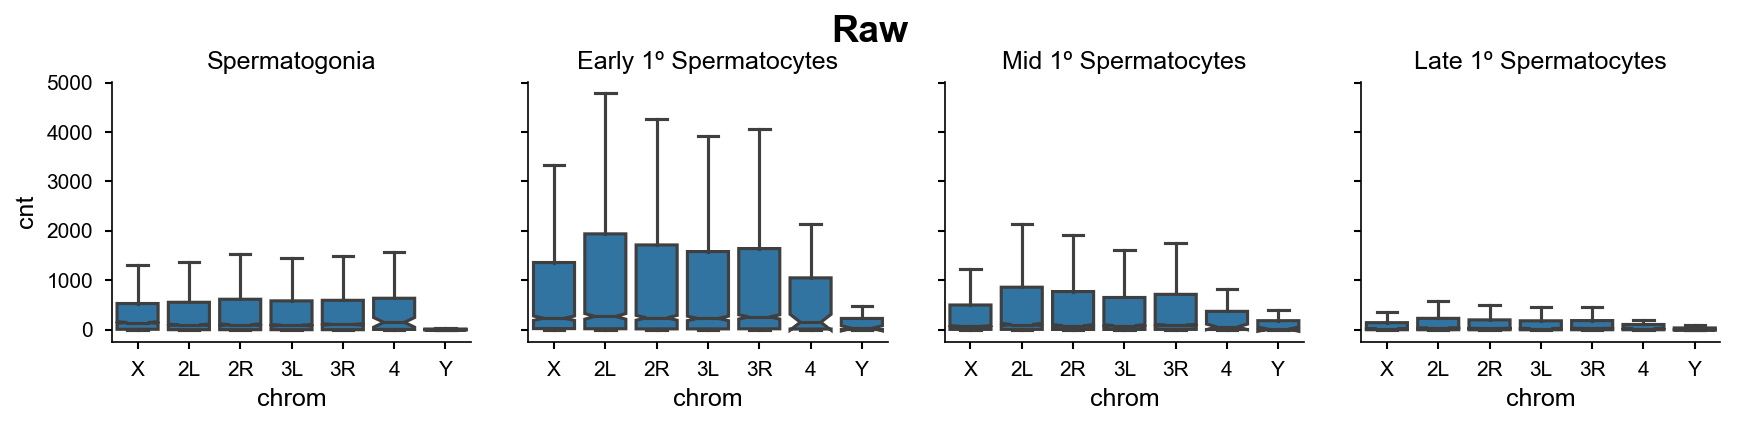

In [188]:
# Gene distribution of raw counts by chrom by germline cluster
germ_cells = nbconfig.sel_cluster_order[:4]
raw = pd.read_parquet('../output/scrnaseq-wf/raw_by_cluster.parquet', columns=germ_cells)

_dat = raw.reset_index()\
    .melt(id_vars='FBgn', var_name='cluster', value_name='cnt')\
    .set_index('FBgn')\
    .join(nbconfig.fbgn2chrom)

g = sns.FacetGrid(_dat, col='cluster')
g.map(sns.boxplot, 'chrom', 'cnt', 
      showfliers=False, notch=True, 
      order=nbconfig.chrom_order
     )\
    .set_titles('{col_name}')\
    .set_xticklabels(
        [x.lstrip('chr') for x in nbconfig.chrom_order], 
        range(len(nbconfig.chrom_order))
    );
g.fig.suptitle('Raw');

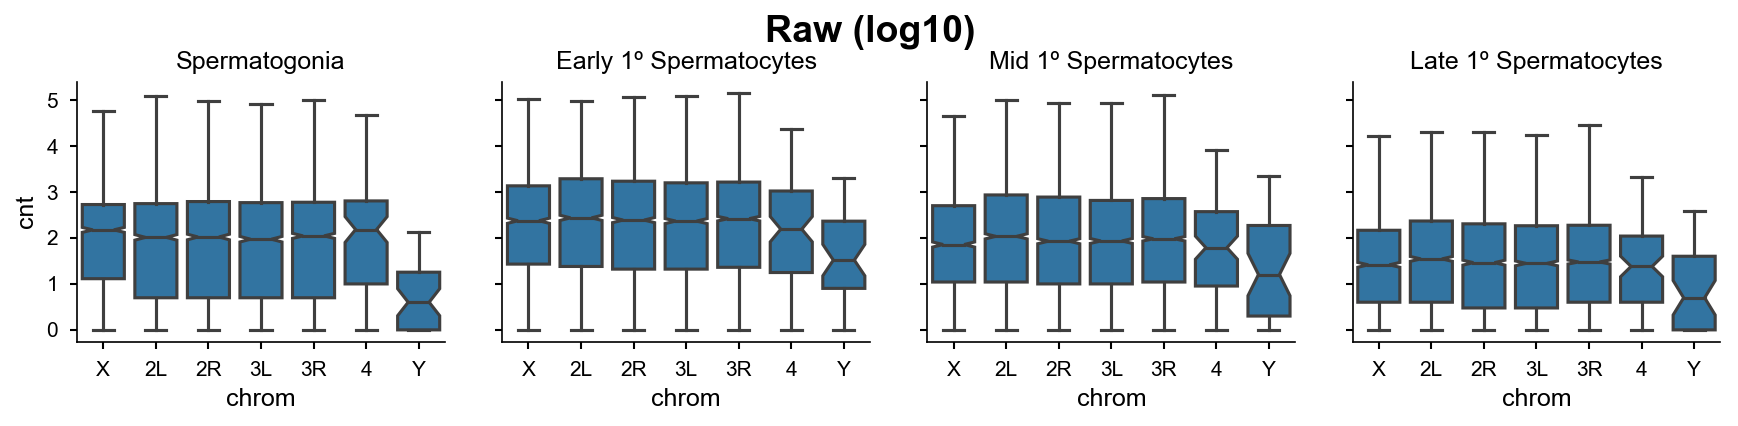

In [189]:
# Gene distribution of log10 raw counts by chrom by germline cluster
germ_cells = nbconfig.sel_cluster_order[:4]
raw = pd.read_parquet('../output/scrnaseq-wf/raw_by_cluster.parquet', columns=germ_cells)
raw = np.log10(raw + 1)

_dat = raw.reset_index()\
    .melt(id_vars='FBgn', var_name='cluster', value_name='cnt')\
    .set_index('FBgn')\
    .join(nbconfig.fbgn2chrom)

g = sns.FacetGrid(_dat, col='cluster')
g.map(sns.boxplot, 'chrom', 'cnt', 
      showfliers=False, notch=True, 
      order=nbconfig.chrom_order
     )\
    .set_titles('{col_name}')\
    .set_xticklabels(
        [x.lstrip('chr') for x in nbconfig.chrom_order], 
        range(len(nbconfig.chrom_order))
    );

g.fig.suptitle('Raw (log10)');

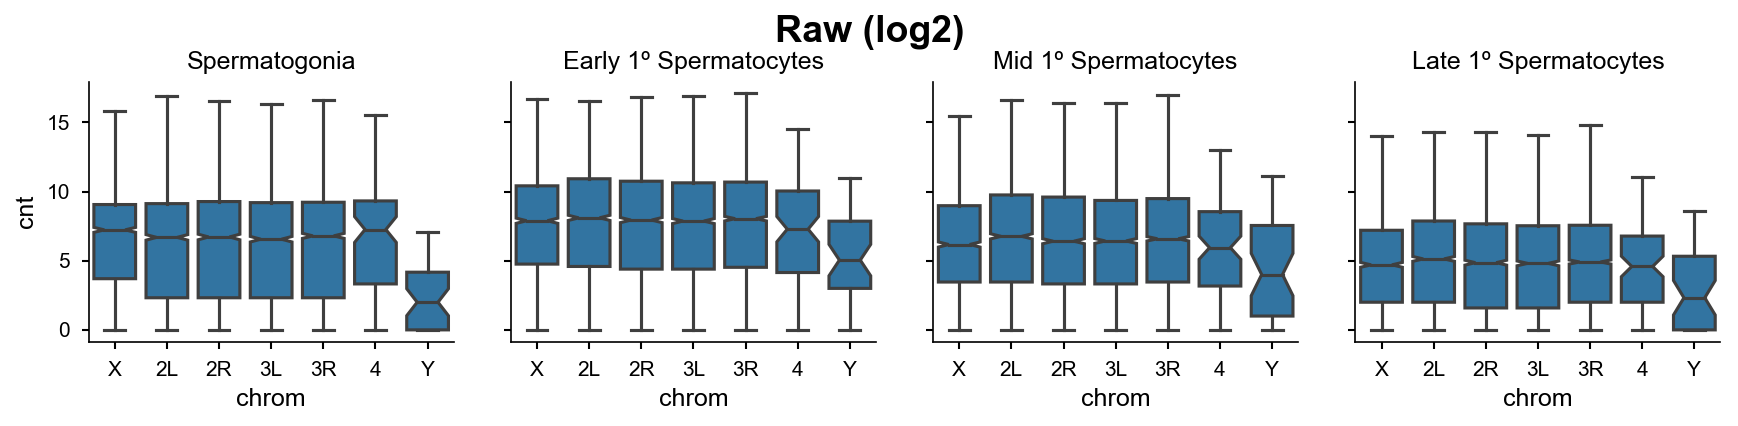

In [190]:
# Gene distribution log2 raw counts by chrom by germline cluster
germ_cells = nbconfig.sel_cluster_order[:4]
raw = pd.read_parquet('../output/scrnaseq-wf/raw_by_cluster.parquet', columns=germ_cells)
raw = np.log2(raw + 1)

_dat = raw.reset_index()\
    .melt(id_vars='FBgn', var_name='cluster', value_name='cnt')\
    .set_index('FBgn')\
    .join(nbconfig.fbgn2chrom)

g = sns.FacetGrid(_dat, col='cluster')
g.map(sns.boxplot, 'chrom', 'cnt', 
      showfliers=False, notch=True, 
      order=nbconfig.chrom_order
     )\
    .set_titles('{col_name}')\
    .set_xticklabels(
        [x.lstrip('chr') for x in nbconfig.chrom_order], 
        range(len(nbconfig.chrom_order))
    );
g.fig.suptitle('Raw (log2)');

#### Seurat Normalized Counts

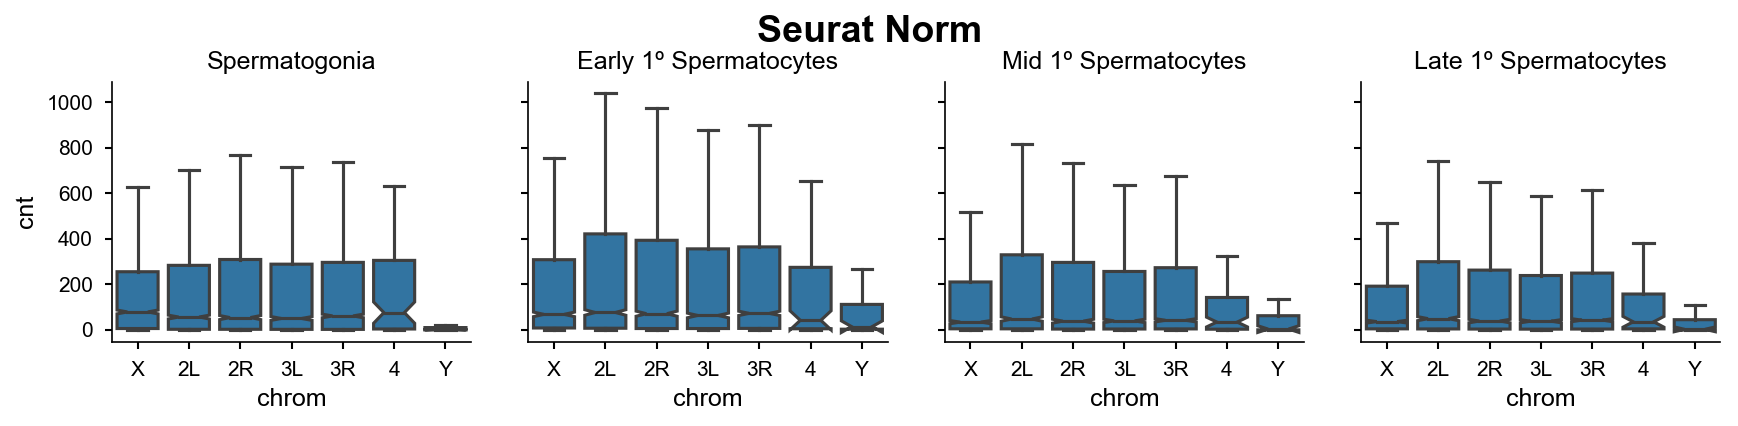

In [193]:
# Gene distribution Seurat normalized counts by chrom by germline cluster
germ_cells = nbconfig.sel_cluster_order[:4]
norm = pd.read_parquet('../output/scrnaseq-wf/seurat_norm_by_cluster.parquet', columns=germ_cells)

_dat = norm.reset_index()\
    .melt(id_vars='FBgn', var_name='cluster', value_name='cnt')\
    .set_index('FBgn')\
    .join(nbconfig.fbgn2chrom)

g = sns.FacetGrid(_dat, col='cluster')
g.map(sns.boxplot, 'chrom', 'cnt', 
      showfliers=False, notch=True, 
      order=nbconfig.chrom_order
     )\
    .set_titles('{col_name}')\
    .set_xticklabels(
        [x.lstrip('chr') for x in nbconfig.chrom_order], 
        range(len(nbconfig.chrom_order))
    );

g.fig.suptitle('Seurat Norm');

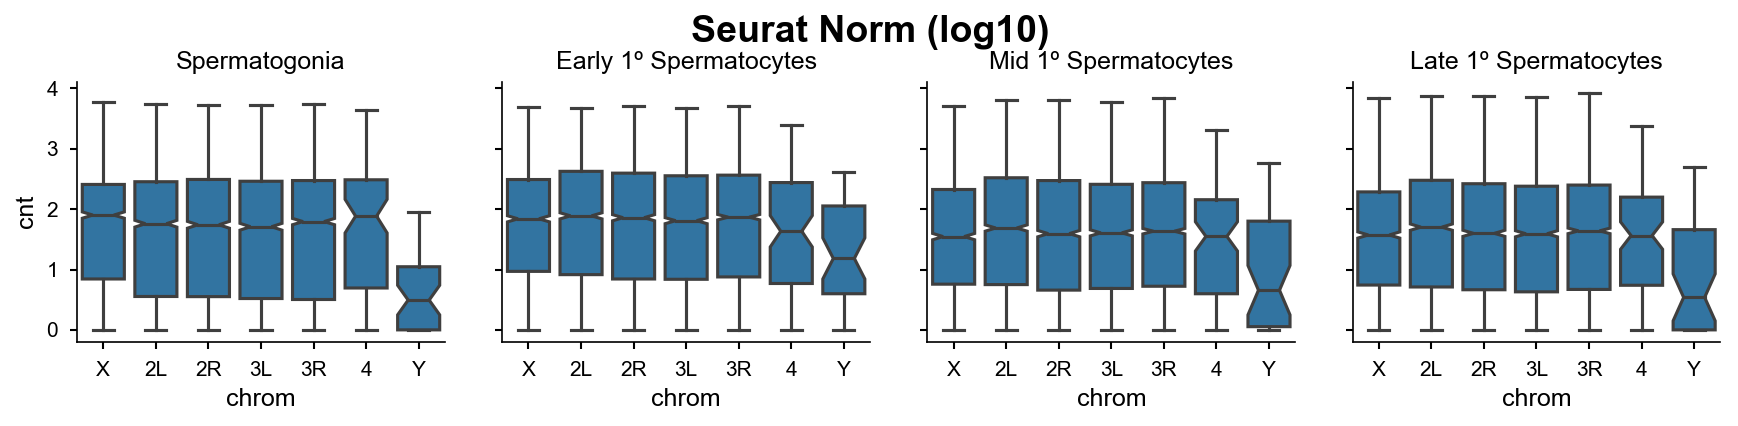

In [194]:
# Gene distribution Seurat log10 normalized counts by chrom by germline cluster
germ_cells = nbconfig.sel_cluster_order[:4]
norm = pd.read_parquet('../output/scrnaseq-wf/seurat_norm_by_cluster.parquet', columns=germ_cells)
norm = np.log10(norm + 1)

_dat = norm.reset_index()\
    .melt(id_vars='FBgn', var_name='cluster', value_name='cnt')\
    .set_index('FBgn')\
    .join(nbconfig.fbgn2chrom)

g = sns.FacetGrid(_dat, col='cluster')
g.map(sns.boxplot, 'chrom', 'cnt', 
      showfliers=False, notch=True, 
      order=nbconfig.chrom_order
     )\
    .set_titles('{col_name}')\
    .set_xticklabels(
        [x.lstrip('chr') for x in nbconfig.chrom_order], 
        range(len(nbconfig.chrom_order))
    );
g.fig.suptitle('Seurat Norm (log10)');

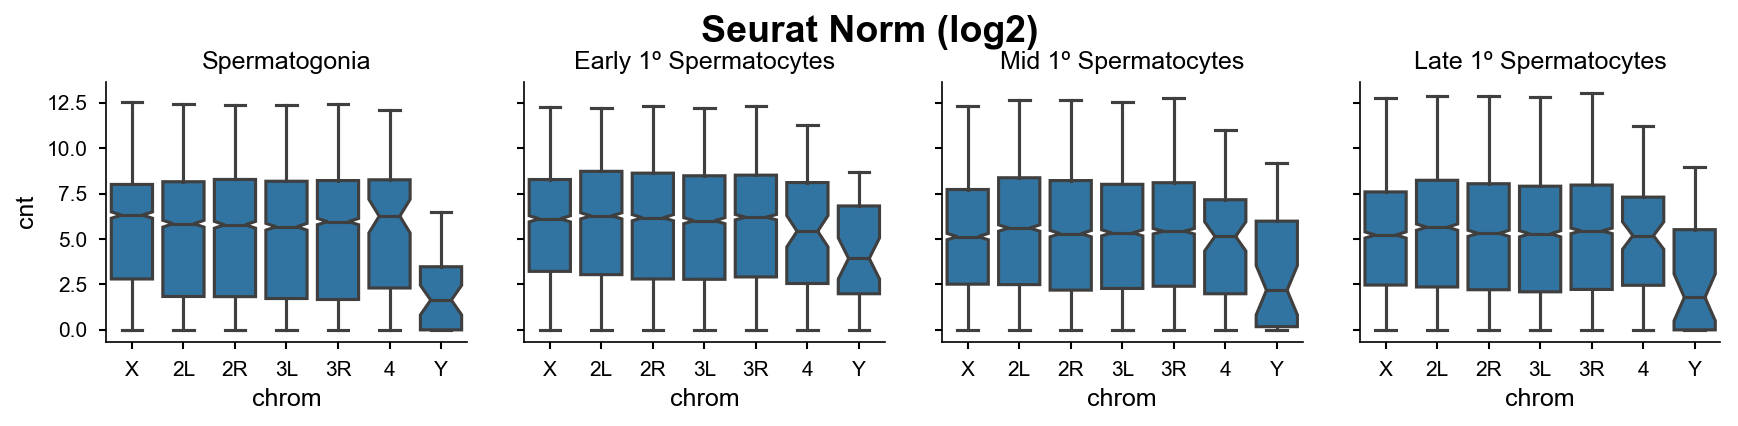

In [195]:
# Gene distribution Seurat log2 normalized counts by chrom by germline cluster
germ_cells = nbconfig.sel_cluster_order[:4]
norm = pd.read_parquet('../output/scrnaseq-wf/seurat_norm_by_cluster.parquet', columns=germ_cells)
norm = np.log2(norm + 1)

_dat = norm.reset_index()\
    .melt(id_vars='FBgn', var_name='cluster', value_name='cnt')\
    .set_index('FBgn')\
    .join(nbconfig.fbgn2chrom)

g = sns.FacetGrid(_dat, col='cluster')
g.map(sns.boxplot, 'chrom', 'cnt', 
      showfliers=False, notch=True, 
      order=nbconfig.chrom_order
     )\
    .set_titles('{col_name}')\
    .set_xticklabels(
        [x.lstrip('chr') for x in nbconfig.chrom_order], 
        range(len(nbconfig.chrom_order))
    );
g.fig.suptitle('Seurat Norm (log2)');

#### TPM Normalized Counts

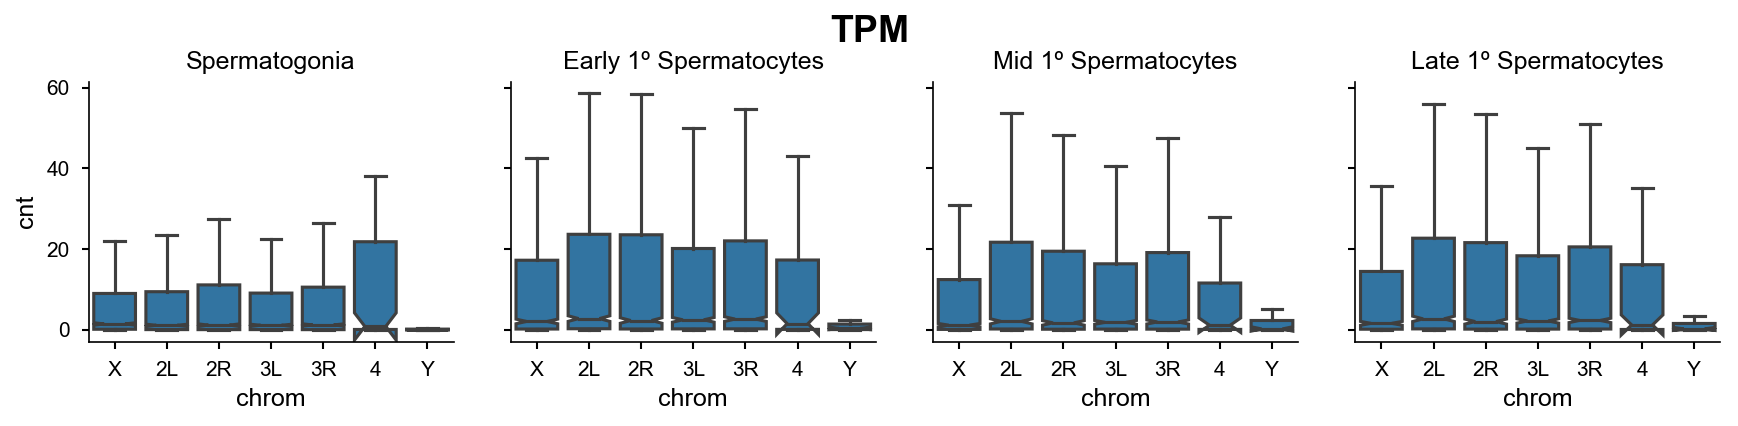

In [196]:
# Gene distribution TPM normalized counts by chrom by germline cluster
germ_cells = nbconfig.sel_cluster_order[:4]
norm = pd.read_parquet('../output/scrnaseq-wf/tpm.parquet', columns=germ_cells)

_dat = norm.reset_index()\
    .melt(id_vars='FBgn', var_name='cluster', value_name='cnt')\
    .set_index('FBgn')\
    .join(nbconfig.fbgn2chrom)

g = sns.FacetGrid(_dat, col='cluster')
g.map(sns.boxplot, 'chrom', 'cnt', 
      showfliers=False, notch=True, 
      order=nbconfig.chrom_order
     )\
    .set_titles('{col_name}')\
    .set_xticklabels(
        [x.lstrip('chr') for x in nbconfig.chrom_order], 
        range(len(nbconfig.chrom_order))
    );
g.fig.suptitle('TPM');

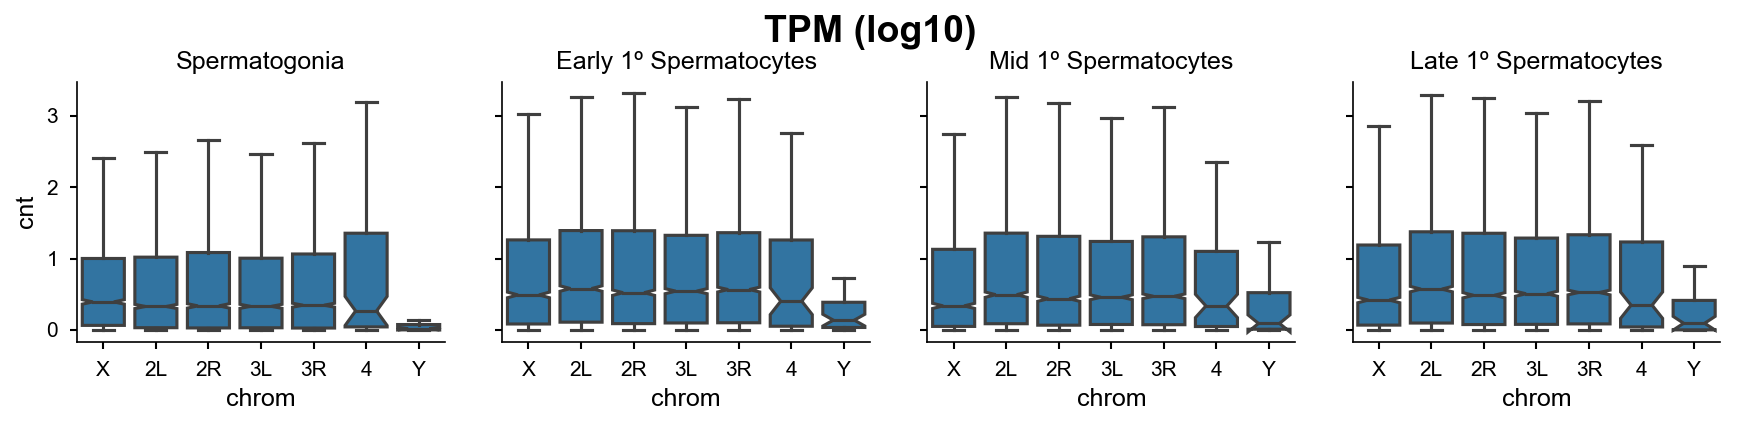

In [197]:
# Gene distribution log10 TPM normalized counts by chrom by germline cluster
germ_cells = nbconfig.sel_cluster_order[:4]
norm = pd.read_parquet('../output/scrnaseq-wf/tpm.parquet', columns=germ_cells)
norm = np.log10(norm + 1)

_dat = norm.reset_index()\
    .melt(id_vars='FBgn', var_name='cluster', value_name='cnt')\
    .set_index('FBgn')\
    .join(nbconfig.fbgn2chrom)

g = sns.FacetGrid(_dat, col='cluster')
g.map(sns.boxplot, 'chrom', 'cnt', 
      showfliers=False, notch=True, 
      order=nbconfig.chrom_order
     )\
    .set_titles('{col_name}')\
    .set_xticklabels(
        [x.lstrip('chr') for x in nbconfig.chrom_order], 
        range(len(nbconfig.chrom_order))
    );
g.fig.suptitle('TPM (log10)');

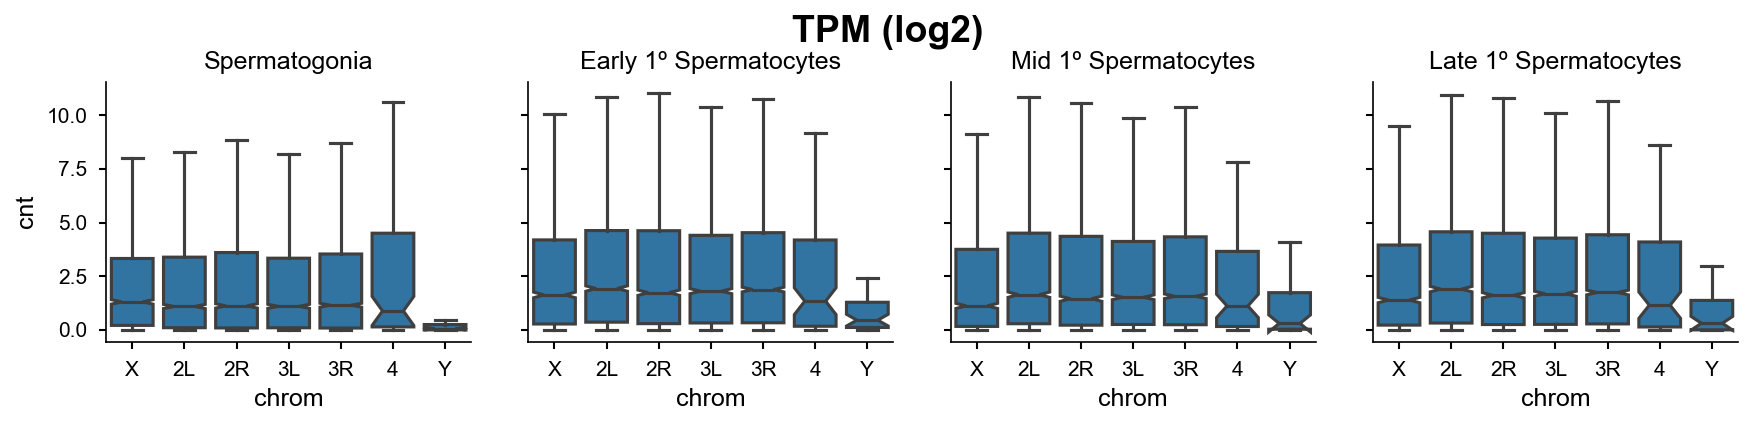

In [198]:
# Gene distribution log2 TPM normalized counts by chrom by germline cluster
germ_cells = nbconfig.sel_cluster_order[:4]
norm = pd.read_parquet('../output/scrnaseq-wf/tpm.parquet', columns=germ_cells)
norm = np.log2(norm + 1)

_dat = norm.reset_index()\
    .melt(id_vars='FBgn', var_name='cluster', value_name='cnt')\
    .set_index('FBgn')\
    .join(nbconfig.fbgn2chrom)

g = sns.FacetGrid(_dat, col='cluster')
g.map(sns.boxplot, 'chrom', 'cnt', 
      showfliers=False, notch=True, 
      order=nbconfig.chrom_order
     )\
    .set_titles('{col_name}')\
    .set_xticklabels(
        [x.lstrip('chr') for x in nbconfig.chrom_order], 
        range(len(nbconfig.chrom_order))
    );
g.fig.suptitle('TPM (log2)');

### Commonly Expressed

In [199]:
from larval_gonad.x_to_a import commonly_expressed
raw = pd.read_parquet('../output/scrnaseq-wf/raw.parquet')
COMMON = commonly_expressed(data=raw)

#### Raw Counts

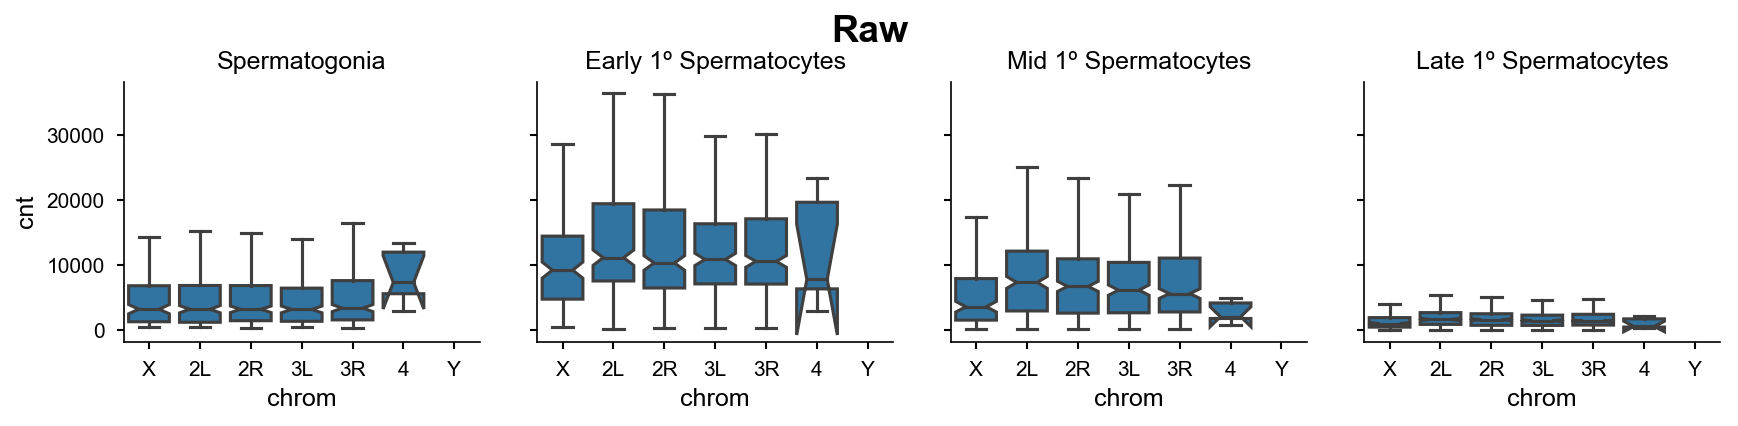

In [200]:
# Gene distribution of raw counts by chrom by germline cluster
germ_cells = nbconfig.sel_cluster_order[:4]
raw = pd.read_parquet('../output/scrnaseq-wf/raw_by_cluster.parquet', columns=germ_cells)
raw = raw.reindex(COMMON)

_dat = raw.reset_index()\
    .melt(id_vars='FBgn', var_name='cluster', value_name='cnt')\
    .set_index('FBgn')\
    .join(nbconfig.fbgn2chrom)

g = sns.FacetGrid(_dat, col='cluster')
g.map(sns.boxplot, 'chrom', 'cnt', 
      showfliers=False, notch=True, 
      order=nbconfig.chrom_order
     )\
    .set_titles('{col_name}')\
    .set_xticklabels(
        [x.lstrip('chr') for x in nbconfig.chrom_order], 
        range(len(nbconfig.chrom_order))
    );
g.fig.suptitle('Raw');

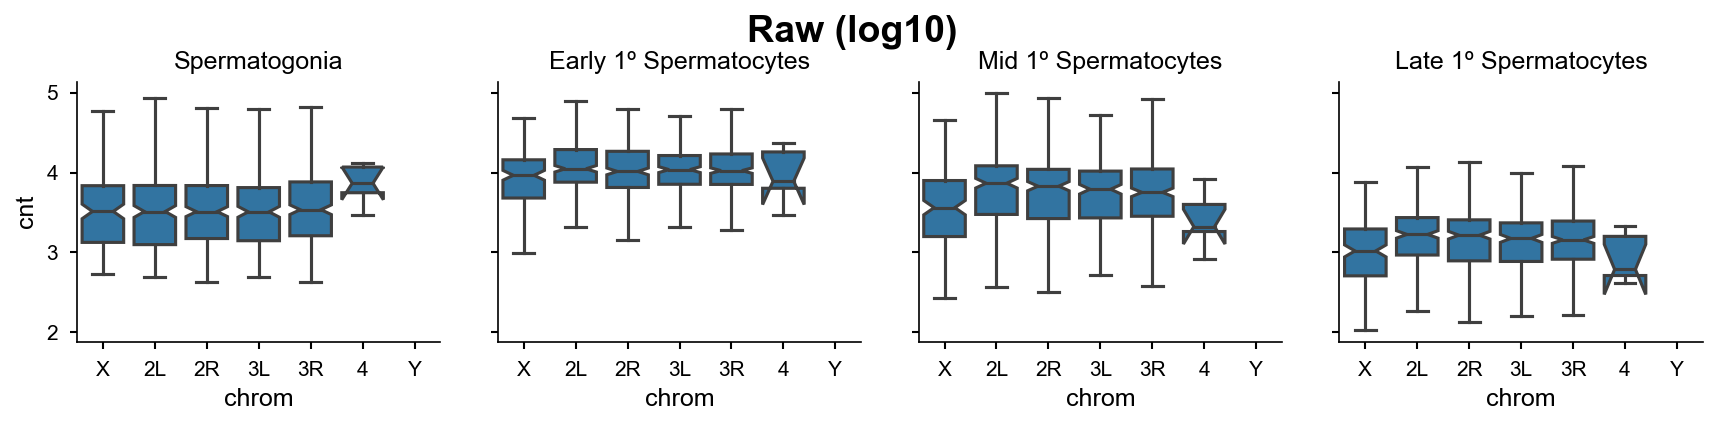

In [201]:
# Gene distribution of log10 raw counts by chrom by germline cluster
germ_cells = nbconfig.sel_cluster_order[:4]
raw = pd.read_parquet('../output/scrnaseq-wf/raw_by_cluster.parquet', columns=germ_cells)
raw = raw.reindex(COMMON)
raw = np.log10(raw + 1)

_dat = raw.reset_index()\
    .melt(id_vars='FBgn', var_name='cluster', value_name='cnt')\
    .set_index('FBgn')\
    .join(nbconfig.fbgn2chrom)

g = sns.FacetGrid(_dat, col='cluster')
g.map(sns.boxplot, 'chrom', 'cnt', 
      showfliers=False, notch=True, 
      order=nbconfig.chrom_order
     )\
    .set_titles('{col_name}')\
    .set_xticklabels(
        [x.lstrip('chr') for x in nbconfig.chrom_order], 
        range(len(nbconfig.chrom_order))
    );
g.fig.suptitle('Raw (log10)');

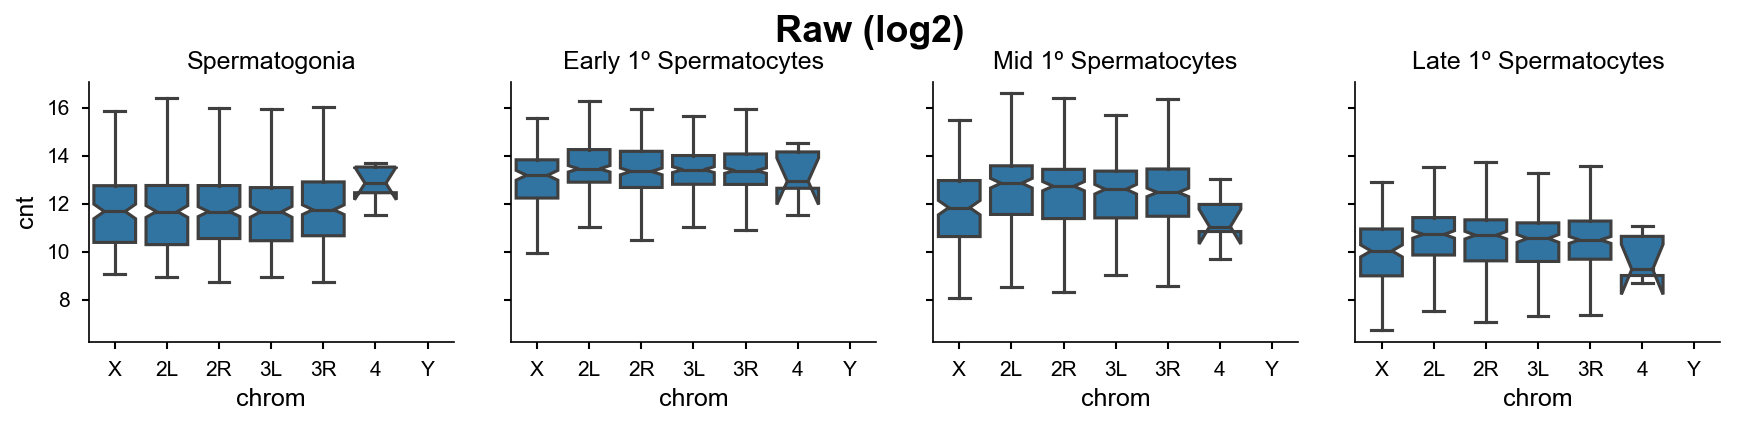

In [202]:
# Gene distribution log2 raw counts by chrom by germline cluster
germ_cells = nbconfig.sel_cluster_order[:4]
raw = pd.read_parquet('../output/scrnaseq-wf/raw_by_cluster.parquet', columns=germ_cells)
raw = raw.reindex(COMMON)
raw = np.log2(raw + 1)

_dat = raw.reset_index()\
    .melt(id_vars='FBgn', var_name='cluster', value_name='cnt')\
    .set_index('FBgn')\
    .join(nbconfig.fbgn2chrom)

g = sns.FacetGrid(_dat, col='cluster')
g.map(sns.boxplot, 'chrom', 'cnt', 
      showfliers=False, notch=True, 
      order=nbconfig.chrom_order
     )\
    .set_titles('{col_name}')\
    .set_xticklabels(
        [x.lstrip('chr') for x in nbconfig.chrom_order], 
        range(len(nbconfig.chrom_order))
    );
g.fig.suptitle('Raw (log2)');

#### Seurat Normalized Counts

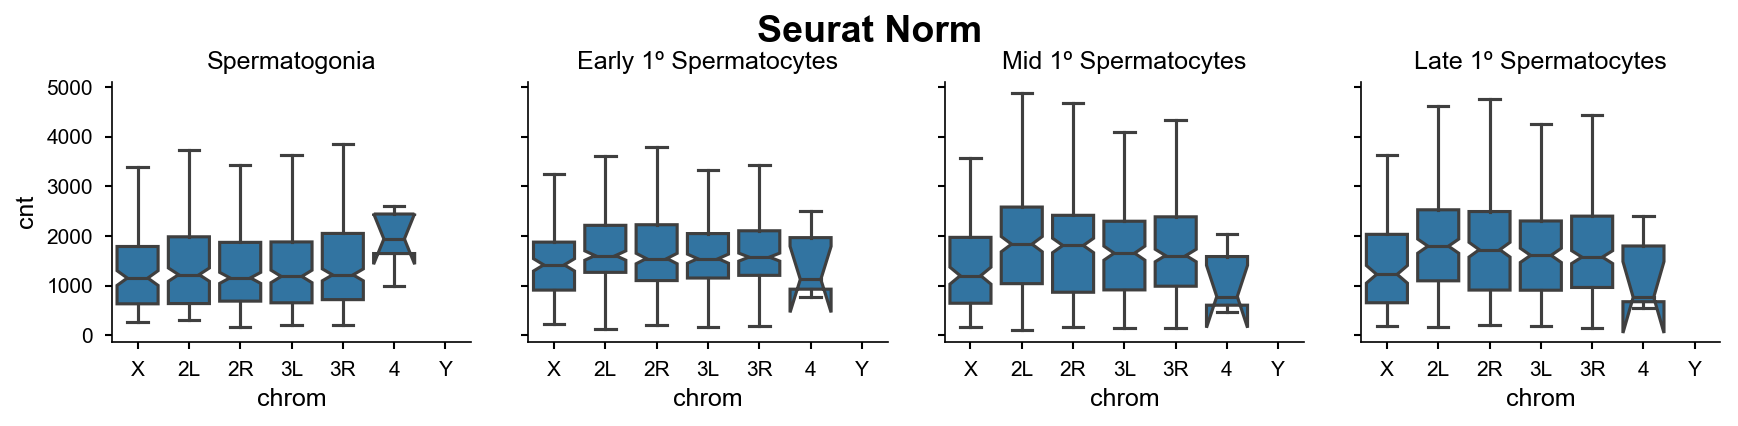

In [203]:
# Gene distribution Seurat normalized counts by chrom by germline cluster
germ_cells = nbconfig.sel_cluster_order[:4]
norm = pd.read_parquet('../output/scrnaseq-wf/seurat_norm_by_cluster.parquet', columns=germ_cells)
norm = norm.reindex(COMMON)

_dat = norm.reset_index()\
    .melt(id_vars='FBgn', var_name='cluster', value_name='cnt')\
    .set_index('FBgn')\
    .join(nbconfig.fbgn2chrom)

g = sns.FacetGrid(_dat, col='cluster')
g.map(sns.boxplot, 'chrom', 'cnt', 
      showfliers=False, notch=True, 
      order=nbconfig.chrom_order
     )\
    .set_titles('{col_name}')\
    .set_xticklabels(
        [x.lstrip('chr') for x in nbconfig.chrom_order], 
        range(len(nbconfig.chrom_order))
    );
g.fig.suptitle('Seurat Norm');

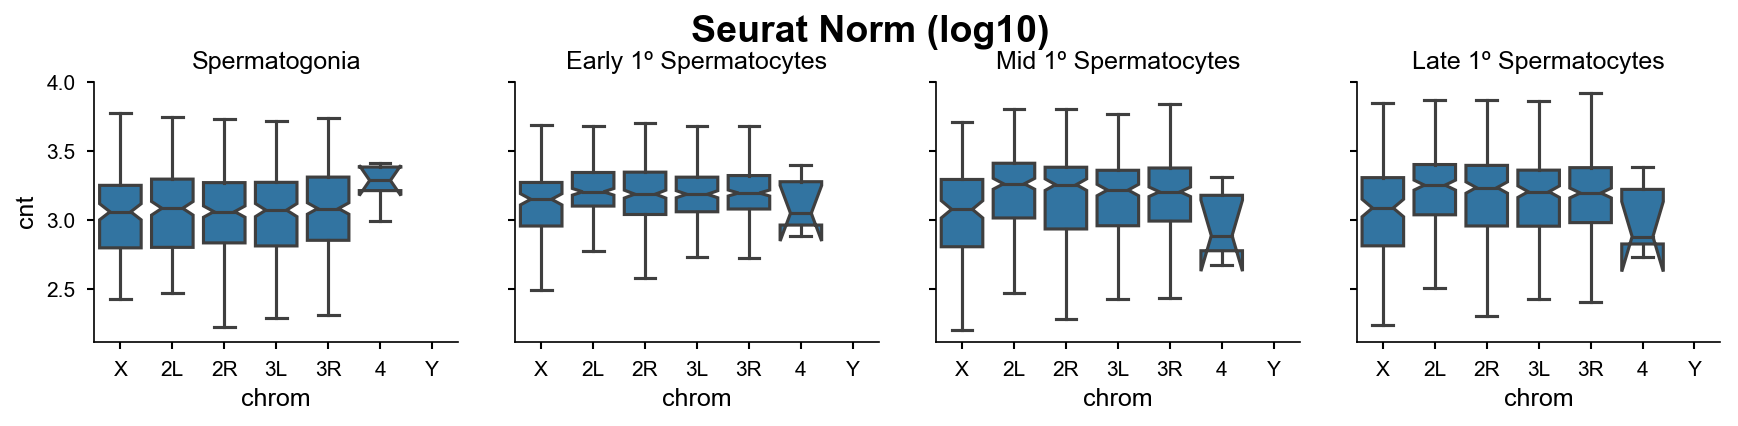

In [204]:
# Gene distribution Seurat log10 normalized counts by chrom by germline cluster
germ_cells = nbconfig.sel_cluster_order[:4]
norm = pd.read_parquet('../output/scrnaseq-wf/seurat_norm_by_cluster.parquet', columns=germ_cells)
norm = norm.reindex(COMMON)
norm = np.log10(norm + 1)

_dat = norm.reset_index()\
    .melt(id_vars='FBgn', var_name='cluster', value_name='cnt')\
    .set_index('FBgn')\
    .join(nbconfig.fbgn2chrom)

g = sns.FacetGrid(_dat, col='cluster')
g.map(sns.boxplot, 'chrom', 'cnt', 
      showfliers=False, notch=True, 
      order=nbconfig.chrom_order
     )\
    .set_titles('{col_name}')\
    .set_xticklabels(
        [x.lstrip('chr') for x in nbconfig.chrom_order], 
        range(len(nbconfig.chrom_order))
    );
g.fig.suptitle('Seurat Norm (log10)');

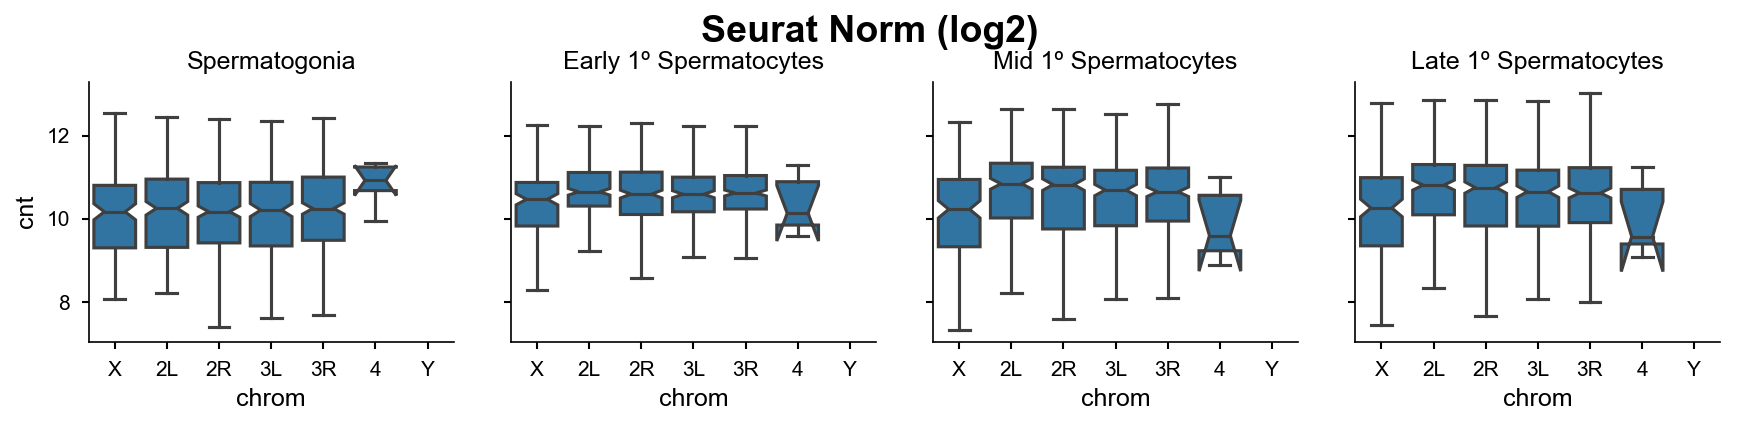

In [205]:
# Gene distribution Seurat log2 normalized counts by chrom by germline cluster
germ_cells = nbconfig.sel_cluster_order[:4]
norm = pd.read_parquet('../output/scrnaseq-wf/seurat_norm_by_cluster.parquet', columns=germ_cells)
norm = norm.reindex(COMMON)
norm = np.log2(norm + 1)

_dat = norm.reset_index()\
    .melt(id_vars='FBgn', var_name='cluster', value_name='cnt')\
    .set_index('FBgn')\
    .join(nbconfig.fbgn2chrom)

g = sns.FacetGrid(_dat, col='cluster')
g.map(sns.boxplot, 'chrom', 'cnt', 
      showfliers=False, notch=True, 
      order=nbconfig.chrom_order
     )\
    .set_titles('{col_name}')\
    .set_xticklabels(
        [x.lstrip('chr') for x in nbconfig.chrom_order], 
        range(len(nbconfig.chrom_order))
    );
g.fig.suptitle('Seurat Norm (log2)');

#### TPM Normalized Counts

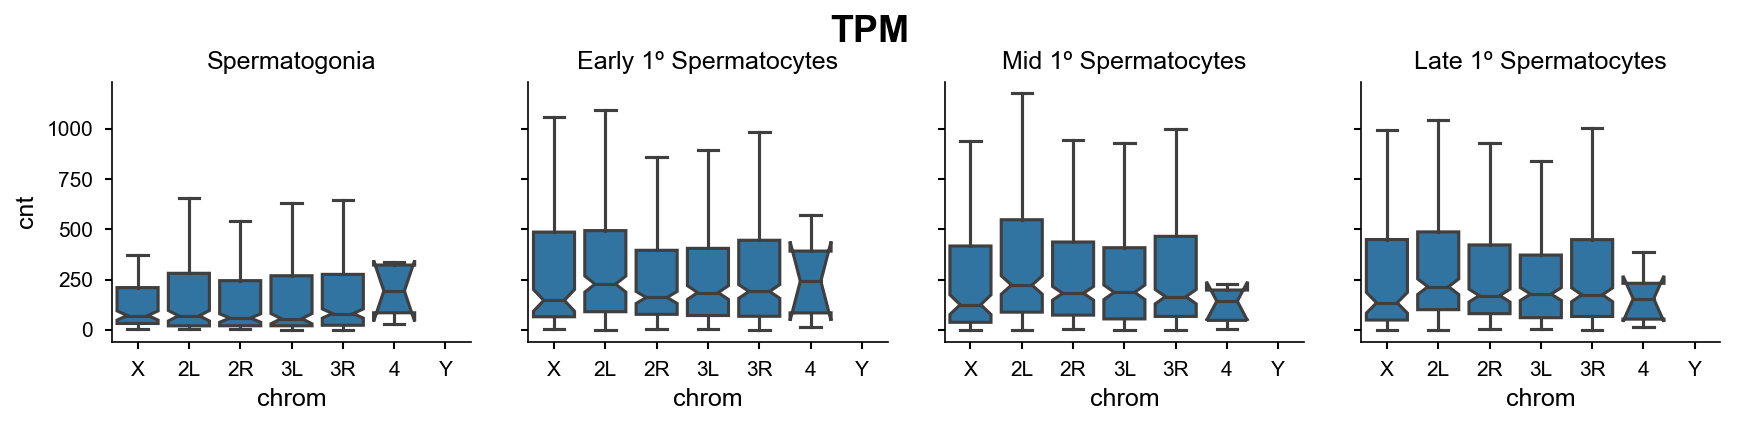

In [206]:
# Gene distribution TPM normalized counts by chrom by germline cluster
germ_cells = nbconfig.sel_cluster_order[:4]
norm = pd.read_parquet('../output/scrnaseq-wf/tpm.parquet', columns=germ_cells)
norm = norm.reindex(COMMON)

_dat = norm.reset_index()\
    .melt(id_vars='FBgn', var_name='cluster', value_name='cnt')\
    .set_index('FBgn')\
    .join(nbconfig.fbgn2chrom)

g = sns.FacetGrid(_dat, col='cluster')
g.map(sns.boxplot, 'chrom', 'cnt', 
      showfliers=False, notch=True, 
      order=nbconfig.chrom_order
     )\
    .set_titles('{col_name}')\
    .set_xticklabels(
        [x.lstrip('chr') for x in nbconfig.chrom_order], 
        range(len(nbconfig.chrom_order))
    );
g.fig.suptitle('TPM');

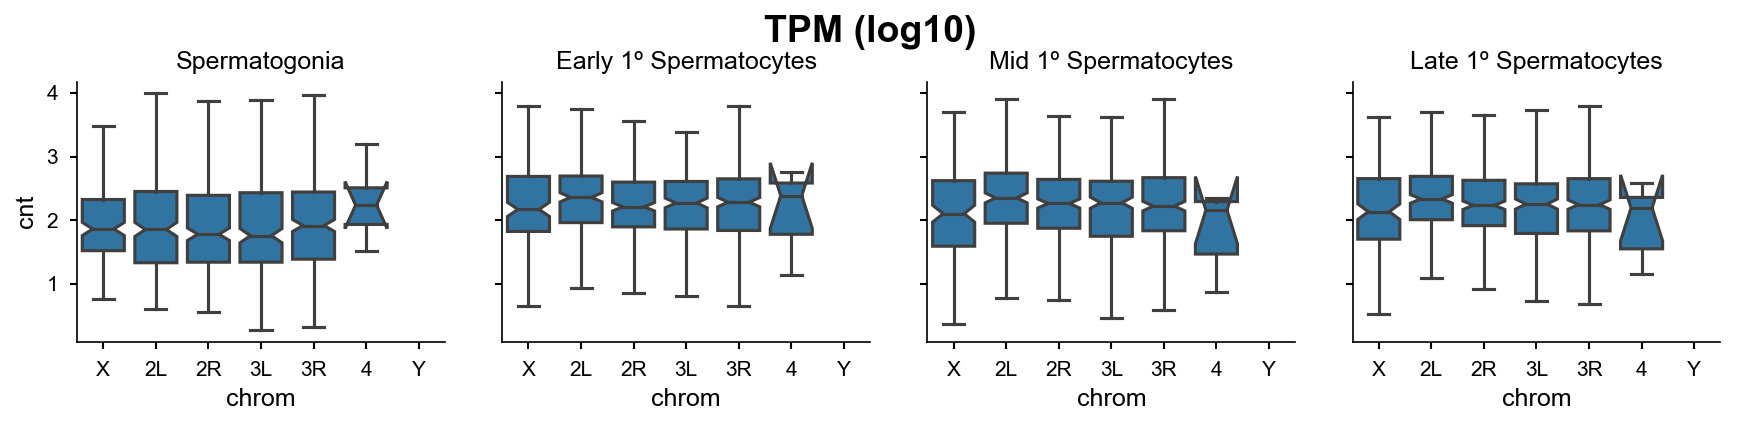

In [207]:
# Gene distribution log10 TPM normalized counts by chrom by germline cluster
germ_cells = nbconfig.sel_cluster_order[:4]
norm = pd.read_parquet('../output/scrnaseq-wf/tpm.parquet', columns=germ_cells)
norm = norm.reindex(COMMON)
norm = np.log10(norm + 1)

_dat = norm.reset_index()\
    .melt(id_vars='FBgn', var_name='cluster', value_name='cnt')\
    .set_index('FBgn')\
    .join(nbconfig.fbgn2chrom)

g = sns.FacetGrid(_dat, col='cluster')
g.map(sns.boxplot, 'chrom', 'cnt', 
      showfliers=False, notch=True, 
      order=nbconfig.chrom_order
     )\
    .set_titles('{col_name}')\
    .set_xticklabels(
        [x.lstrip('chr') for x in nbconfig.chrom_order], 
        range(len(nbconfig.chrom_order))
    );
g.fig.suptitle('TPM (log10)');

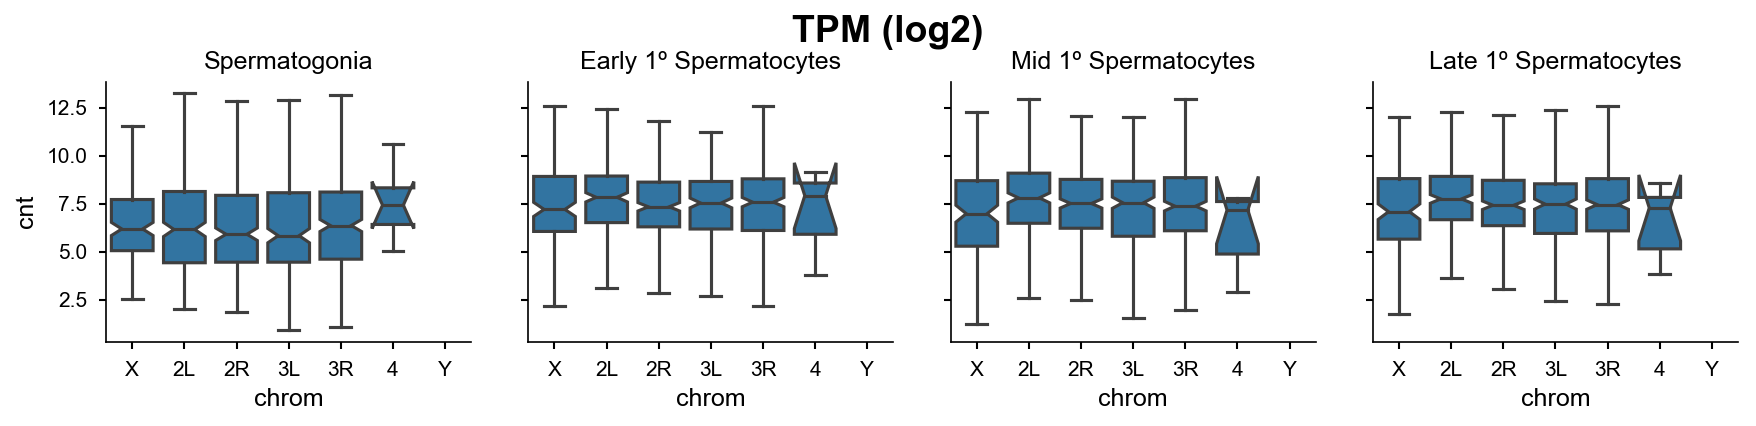

In [208]:
# Gene distribution log2 TPM normalized counts by chrom by germline cluster
germ_cells = nbconfig.sel_cluster_order[:4]
norm = pd.read_parquet('../output/scrnaseq-wf/tpm.parquet', columns=germ_cells)
norm = norm.reindex(COMMON)
norm = np.log2(norm + 1)

_dat = norm.reset_index()\
    .melt(id_vars='FBgn', var_name='cluster', value_name='cnt')\
    .set_index('FBgn')\
    .join(nbconfig.fbgn2chrom)

g = sns.FacetGrid(_dat, col='cluster')
g.map(sns.boxplot, 'chrom', 'cnt', 
      showfliers=False, notch=True, 
      order=nbconfig.chrom_order
     )\
    .set_titles('{col_name}')\
    .set_xticklabels(
        [x.lstrip('chr') for x in nbconfig.chrom_order], 
        range(len(nbconfig.chrom_order))
    );
g.fig.suptitle('TPM (log2)');

## X To A Ratio

### Scaled

#### All Genes

##### Raw

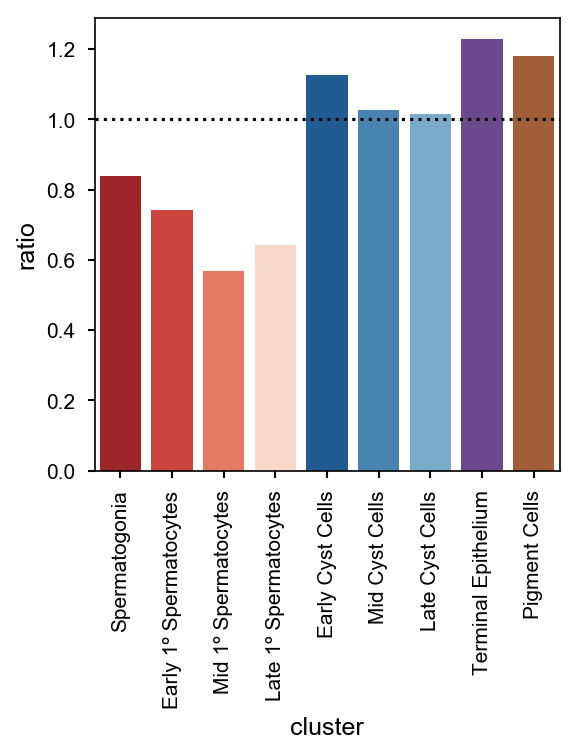

In [209]:
# X:A raw counts by chrom by germline cluster
raw = pd.read_parquet('../output/scrnaseq-wf/raw_by_cluster.parquet')

# Get a list of genes on
gene_on = raw.index[(raw.sum(axis=1) > 0)]
chroms = nbconfig.fbgn2chrom.reindex(gene_on)

mapper = {
    'chr2L': 'A',
    'chr2R': 'A',
    'chr3L': 'A',
    'chr3R': 'A',
    'chrX': 'X',
    'chr4': '4',
    'chrY': np.nan,
    'chrM': np.nan,
}

# Get list of genes by chrom
chroms.chrom = chroms.chrom.replace(mapper)
gene_counts = chroms.groupby('chrom').size()

# munge data
_dat = raw.reindex(gene_on).reset_index()\
    .melt(id_vars='FBgn', var_name='cluster', value_name='cnt')\
    .set_index('FBgn')\
    .join(nbconfig.fbgn2chrom)

_dat.chrom = _dat.chrom.replace(mapper)

# aggregate reads by cluster and chrom
_dat2 = _dat.groupby(['cluster', 'chrom']).sum().unstack()
_dat2.columns = _dat2.columns.droplevel(0)

# Scale by number of genes on chrom
_dat2 = _dat2.div(gene_counts, axis='columns')

# calculate X:A ratio
_ratio = (_dat2['X'] / _dat2['A']).reset_index()
_ratio.columns = ['cluster', 'ratio']

ax = sns.barplot('cluster', 'ratio', data=_ratio, order=nbconfig.sel_cluster_order, palette=nbconfig.colors['clusters'])
ax.axhline(1, ls=':', color='k')
plt.setp(ax.get_xticklabels(), rotation=90);

##### Seurat Normalized Counts

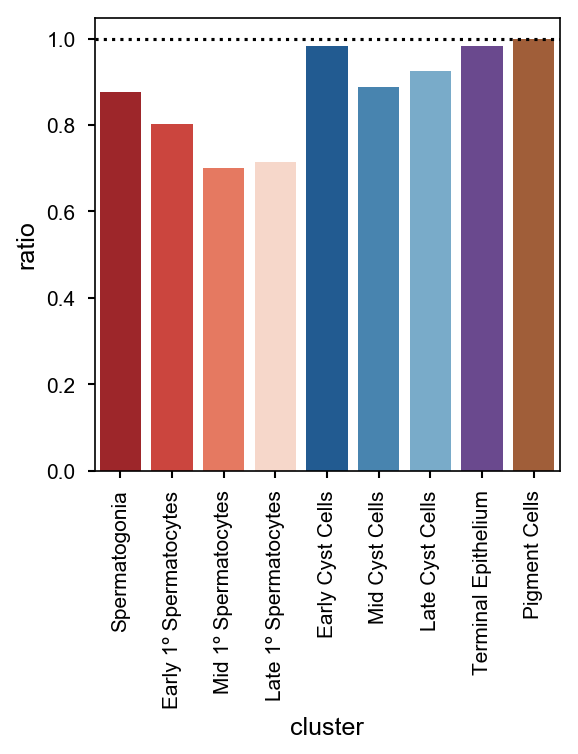

In [210]:
# X:A seurat norm counts by chrom by germline cluster
norm = pd.read_parquet('../output/scrnaseq-wf/seurat_norm_by_cluster.parquet')

# Get a list of genes on
gene_on = norm.index[(norm.sum(axis=1) > 0)]
chroms = nbconfig.fbgn2chrom.reindex(gene_on)

mapper = {
    'chr2L': 'A',
    'chr2R': 'A',
    'chr3L': 'A',
    'chr3R': 'A',
    'chrX': 'X',
    'chr4': '4',
    'chrY': np.nan,
    'chrM': np.nan,
}

# Get list of genes by chrom
chroms.chrom = chroms.chrom.replace(mapper)
gene_counts = chroms.groupby('chrom').size()

# munge data
_dat = norm.reindex(gene_on).reset_index()\
    .melt(id_vars='FBgn', var_name='cluster', value_name='cnt')\
    .set_index('FBgn')\
    .join(nbconfig.fbgn2chrom)

_dat.chrom = _dat.chrom.replace(mapper)

# aggregate reads by cluster and chrom
_dat2 = _dat.groupby(['cluster', 'chrom']).sum().unstack()
_dat2.columns = _dat2.columns.droplevel(0)

# Scale by number of genes on chrom
_dat2 = _dat2.div(gene_counts, axis='columns')

# calculate X:A ratio
_ratio = (_dat2['X'] / _dat2['A']).reset_index()
_ratio.columns = ['cluster', 'ratio']

ax = sns.barplot('cluster', 'ratio', data=_ratio, order=nbconfig.sel_cluster_order, palette=nbconfig.colors['clusters'])
ax.axhline(1, ls=':', color='k')
plt.setp(ax.get_xticklabels(), rotation=90);

##### TPM Normalized Counts

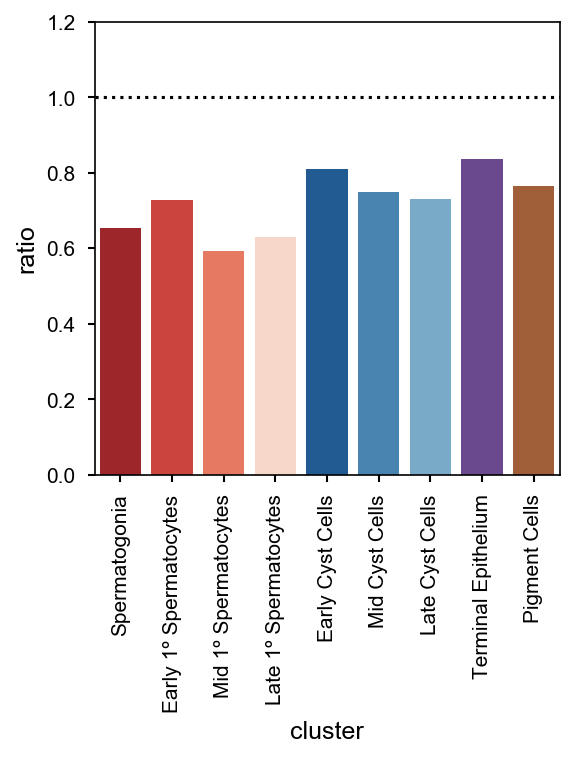

In [211]:
# X:A TPM norm counts by chrom by germline cluster
norm = pd.read_parquet('../output/scrnaseq-wf/tpm.parquet')

# Get a list of genes on
gene_on = norm.index[(norm.sum(axis=1) > 0)]
chroms = nbconfig.fbgn2chrom.reindex(gene_on)

mapper = {
    'chr2L': 'A',
    'chr2R': 'A',
    'chr3L': 'A',
    'chr3R': 'A',
    'chrX': 'X',
    'chr4': '4',
    'chrY': np.nan,
    'chrM': np.nan,
}

# Get list of genes by chrom
chroms.chrom = chroms.chrom.replace(mapper)
gene_counts = chroms.groupby('chrom').size()

# munge data
_dat = norm.reindex(gene_on).reset_index()\
    .melt(id_vars='FBgn', var_name='cluster', value_name='cnt')\
    .set_index('FBgn')\
    .join(nbconfig.fbgn2chrom)

_dat.chrom = _dat.chrom.replace(mapper)

# aggregate reads by cluster and chrom
_dat2 = _dat.groupby(['cluster', 'chrom']).sum().unstack()
_dat2.columns = _dat2.columns.droplevel(0)

# Scale by number of genes on chrom
_dat2 = _dat2.div(gene_counts, axis='columns')

# calculate X:A ratio
_ratio = (_dat2['X'] / _dat2['A']).reset_index()
_ratio.columns = ['cluster', 'ratio']

ax = sns.barplot('cluster', 'ratio', data=_ratio, order=nbconfig.sel_cluster_order, palette=nbconfig.colors['clusters'])
ax.set_ylim(0, 1.2)
ax.axhline(1, ls=':', color='k')
plt.setp(ax.get_xticklabels(), rotation=90);

### Not Scaled

#### All Genes

##### Raw

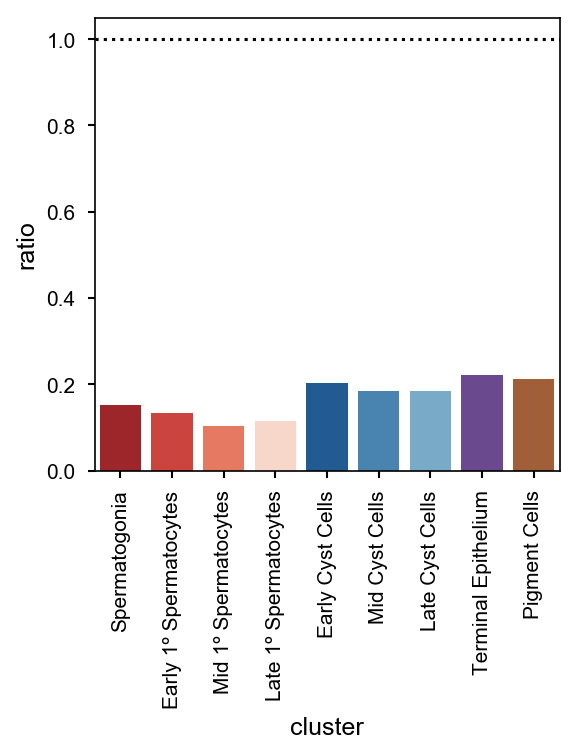

In [222]:
# X:A raw counts by chrom by germline cluster
raw = pd.read_parquet('../output/scrnaseq-wf/raw_by_cluster.parquet')

# Get a list of genes on
gene_on = raw.index[(raw.sum(axis=1) > 0)]

mapper = {
    'chr2L': 'A',
    'chr2R': 'A',
    'chr3L': 'A',
    'chr3R': 'A',
    'chrX': 'X',
    'chr4': '4',
    'chrY': np.nan,
    'chrM': np.nan,
}

# munge data
_dat = raw.reindex(gene_on).reset_index()\
    .melt(id_vars='FBgn', var_name='cluster', value_name='cnt')\
    .set_index('FBgn')\
    .join(nbconfig.fbgn2chrom)

_dat.chrom = _dat.chrom.replace(mapper)

# aggregate reads by cluster and chrom
_dat2 = _dat.groupby(['cluster', 'chrom']).sum().unstack()
_dat2.columns = _dat2.columns.droplevel(0)

# calculate X:A ratio
_ratio = (_dat2['X'] / _dat2['A']).reset_index()
_ratio.columns = ['cluster', 'ratio']

ax = sns.barplot('cluster', 'ratio', data=_ratio, order=nbconfig.sel_cluster_order, palette=nbconfig.colors['clusters'])
ax.axhline(1, ls=':', color='k')
plt.setp(ax.get_xticklabels(), rotation=90);

##### Seurat Normalized Counts

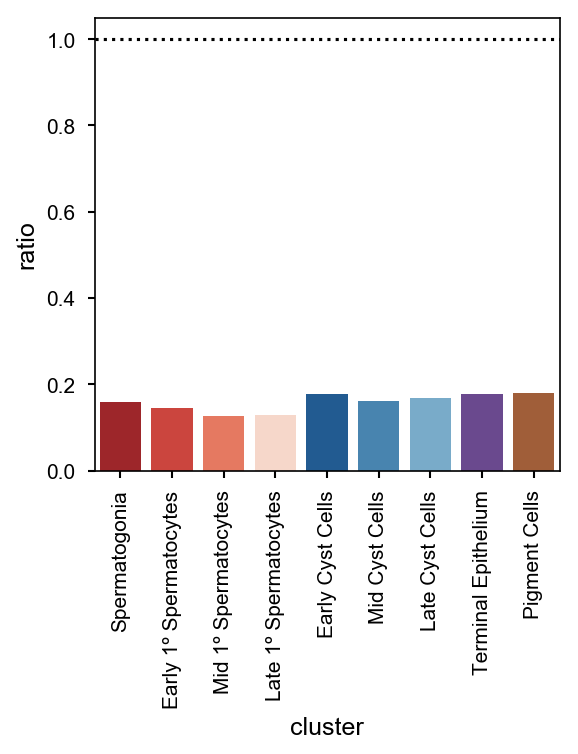

In [223]:
# X:A seurat norm counts by chrom by germline cluster
norm = pd.read_parquet('../output/scrnaseq-wf/seurat_norm_by_cluster.parquet')

# Get a list of genes on
gene_on = norm.index[(norm.sum(axis=1) > 0)]

mapper = {
    'chr2L': 'A',
    'chr2R': 'A',
    'chr3L': 'A',
    'chr3R': 'A',
    'chrX': 'X',
    'chr4': '4',
    'chrY': np.nan,
    'chrM': np.nan,
}

# munge data
_dat = norm.reindex(gene_on).reset_index()\
    .melt(id_vars='FBgn', var_name='cluster', value_name='cnt')\
    .set_index('FBgn')\
    .join(nbconfig.fbgn2chrom)

_dat.chrom = _dat.chrom.replace(mapper)

# aggregate reads by cluster and chrom
_dat2 = _dat.groupby(['cluster', 'chrom']).sum().unstack()
_dat2.columns = _dat2.columns.droplevel(0)

# calculate X:A ratio
_ratio = (_dat2['X'] / _dat2['A']).reset_index()
_ratio.columns = ['cluster', 'ratio']

ax = sns.barplot('cluster', 'ratio', data=_ratio, order=nbconfig.sel_cluster_order, palette=nbconfig.colors['clusters'])
ax.axhline(1, ls=':', color='k')
plt.setp(ax.get_xticklabels(), rotation=90);

##### TPM Normalized Counts

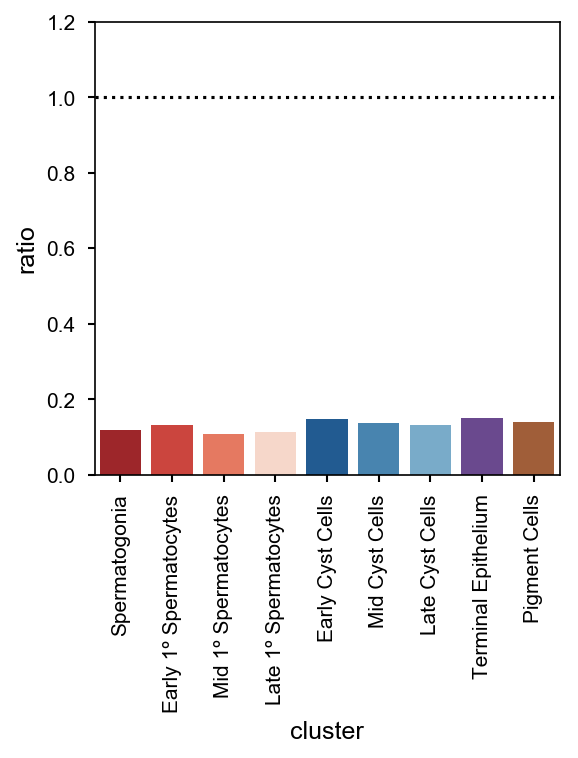

In [224]:
# X:A TPM norm counts by chrom by germline cluster
norm = pd.read_parquet('../output/scrnaseq-wf/tpm.parquet')

# Get a list of genes on
gene_on = norm.index[(norm.sum(axis=1) > 0)]

mapper = {
    'chr2L': 'A',
    'chr2R': 'A',
    'chr3L': 'A',
    'chr3R': 'A',
    'chrX': 'X',
    'chr4': '4',
    'chrY': np.nan,
    'chrM': np.nan,
}

# munge data
_dat = norm.reindex(gene_on).reset_index()\
    .melt(id_vars='FBgn', var_name='cluster', value_name='cnt')\
    .set_index('FBgn')\
    .join(nbconfig.fbgn2chrom)

_dat.chrom = _dat.chrom.replace(mapper)

# aggregate reads by cluster and chrom
_dat2 = _dat.groupby(['cluster', 'chrom']).sum().unstack()
_dat2.columns = _dat2.columns.droplevel(0)

# calculate X:A ratio
_ratio = (_dat2['X'] / _dat2['A']).reset_index()
_ratio.columns = ['cluster', 'ratio']

ax = sns.barplot('cluster', 'ratio', data=_ratio, order=nbconfig.sel_cluster_order, palette=nbconfig.colors['clusters'])
ax.set_ylim(0, 1.2)
ax.axhline(1, ls=':', color='k')
plt.setp(ax.get_xticklabels(), rotation=90);

In [16]:
# X:A TPM norm counts by chrom by germline cluster
norm = pd.read_parquet('../output/scrnaseq-wf/tpm_w_rep.parquet')

# Get a list of genes on
gene_on = norm.index[(norm.sum(axis=1) > 0)]

mapper = {
    'chr2L': 'A',
    'chr2R': 'A',
    'chr3L': 'A',
    'chr3R': 'A',
    'chrX': 'X',
    'chr4': '4',
    'chrY': np.nan,
    'chrM': np.nan,
}

In [18]:
meds = norm.reindex(gene_on).join(nbconfig.fbgn2chrom.chrom.map(mapper)).groupby('chrom').median()

In [36]:
ratios = meds.T['X'] / meds.T['A']
ratios = ratios.loc[nbconfig.sel_cluster_order_w_rep]
ratios.index.name = 'cluster_w_rep'
ratios.name = 'ratio'

In [45]:
reps = ratios.index.str.extract('(?P<cluster>[\w\s]+)-(?P<rep>rep\d)')
reps.index = ratios.index

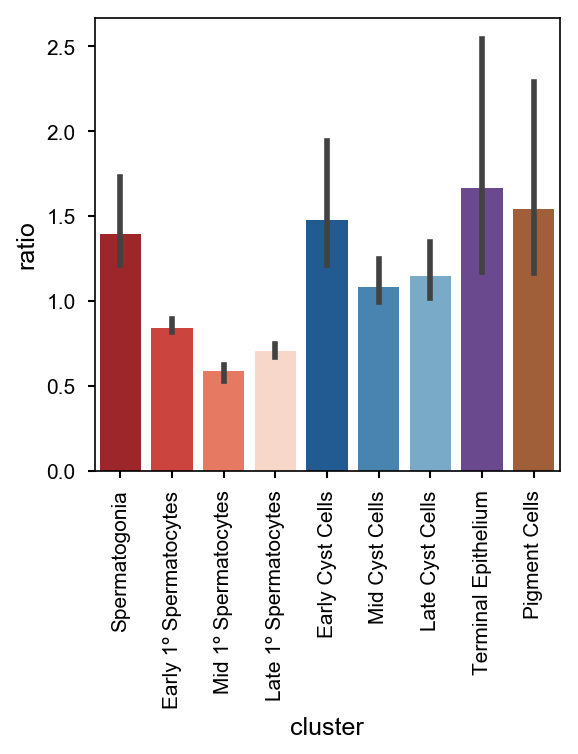

In [58]:
_dat = reps.join(ratios)
ax = sns.barplot('cluster', 'ratio', data=_dat, order=nbconfig.sel_cluster_order, palette=nbconfig.colors['clusters'])
plt.setp(ax.get_xticklabels(), rotation=90);

In [62]:
_piv = _dat.pivot(columns='cluster', values='ratio', index='rep')

In [91]:
def calc_pval(l1, l2):
    _d1 = _piv.iloc[:, l1]
    _d2 = _piv.iloc[:, l2]
    _, pval = kruskal(_d1, _d2)
    return (_d1.name, _d2.name, pval)

In [92]:
res = [
    calc_pval(0, 1),
    calc_pval(0, 2),
    calc_pval(0, 3),
    calc_pval(1, 2),
    calc_pval(1, 3),
    calc_pval(2, 3),
]

In [104]:
pd.DataFrame(res, columns=['c1', 'c2', 'pval']).sort_values('c2')

,c1,c2,pval
0,Early 1º Spermatocytes,Early Cyst Cells,0.049535
1,Early 1º Spermatocytes,Late 1º Spermatocytes,0.049535
8,Early Cyst Cells,Late 1º Spermatocytes,0.049535
2,Early 1º Spermatocytes,Late Cyst Cells,0.049535
9,Early Cyst Cells,Late Cyst Cells,0.275234
15,Late 1º Spermatocytes,Late Cyst Cells,0.049535
3,Early 1º Spermatocytes,Mid 1º Spermatocytes,0.049535
21,Late Cyst Cells,Mid 1º Spermatocytes,0.049535
16,Late 1º Spermatocytes,Mid 1º Spermatocytes,0.049535
10,Early Cyst Cells,Mid 1º Spermatocytes,0.049535


In [96]:
from itertools import combinations

In [101]:
res = []
for i, j in combinations(range(9), 2):
    res.append(calc_pval(i, j))